# Projeto CDD

## Bibliotecas

In [619]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

## Junção de Dados

Leitura dos Documentos

In [620]:
idh = pd.read_excel('hdi_human_development_index.xlsx')
hiv = pd.read_excel('annual_hiv_deaths_number_all_ages.xlsx')
med = pd.read_excel('medical_doctors_per_1000_people.xlsx')
pop = pd.read_excel('population_total.xlsx')

Seleção do Ano de interressa para análise

In [621]:
idh_2009 = idh.loc[:, ["geo", 2009]]
hiv_2009 = hiv.loc[:, ["geo", 2009]]
med_2009 = med.loc[:, ["geo", 2009]]
pop_2009 = pop.loc[:, ["geo", 2009]]

Mudando o índice

In [622]:
idh_idx = idh_2009.set_index('geo')
hiv_idx = hiv_2009.set_index('geo')
med_idx = med_2009.set_index('geo')
pop_idx = pop_2009.set_index('geo')

Junção no DataFrame

In [623]:
data = idh_idx.join(med_idx, how='inner', lsuffix='_idh', rsuffix='_med')
dados = med_idx.join(pop_idx, how='inner', lsuffix='_hiv', rsuffix='_pop')

Criação da Coluna Mortes Anuais por HIV a cada 10000 pessoas

In [624]:
data['hiv_100m_pessoas'] = (dados['2009_hiv'] / (dados['2009_pop']/(10000)))

Formatação dos Nomes das Colunas

In [625]:
data.columns = ['idh','med_1000_pessoas', 'hiv_100m_pessoas']

IDH em Porcentagem

In [626]:
data.idh = data.idh * 100

Limpando dados Vazios

In [627]:
data = data.dropna(thresh=3)

Criação da coluna Mortes Anuais de HIV por 10000 pessoas e Categorias do IDH

In [628]:
data['Cat_IDH'] = data.idh

In [629]:
data.Cat_IDH[(data.Cat_IDH < 55.5)] = data.Cat_IDH[(data.Cat_IDH < 55.5)] * 0 + 3

In [630]:
data.Cat_IDH[(data.Cat_IDH > 55.5) & (data.Cat_IDH < 70.0)] = data.Cat_IDH[(data.Cat_IDH > 55.5) & (data.Cat_IDH < 70.0)] * 0 + 2

In [631]:
data.Cat_IDH[(data.Cat_IDH < 80.0) & (data.Cat_IDH > 69.9)] = data.Cat_IDH[(data.Cat_IDH < 80.0) & (data.Cat_IDH > 69.9)] * 0 + 1

In [632]:
data.Cat_IDH[data.Cat_IDH > 79.9] = data.Cat_IDH[data.Cat_IDH > 79.9] * 0

Definindo Categorias do IDH

In [633]:
data.Cat_IDH = data.Cat_IDH.astype('category')

In [634]:
data.Cat_IDH.cat.categories = ['Muito Elevado', 'Elevado', 'Médio', 'Baixo']

Arredondando valores com muitas casa decimais

In [635]:
data.hiv_100m_pessoas = round(data.hiv_100m_pessoas, 4)

Junção em um novo Excel Base

In [636]:
data.to_excel("Base.xlsx")

In [637]:
data.head(5)

,idh,med_1000_pessoas,hiv_100m_pessoas,Cat_IDH
geo,,,,
Afghanistan,44.8,0.222,0.0001,Baixo
Albania,72.5,1.140,0.0039,Elevado
Angola,48.8,0.144,0.0001,Baixo
Armenia,72.0,2.680,0.0093,Elevado
Australia,92.7,2.880,0.0013,Muito Elevado


## Analisando os Dados sobre HIV

In [638]:
data.hiv_100m_pessoas.describe()

count    103.000000
mean       0.014956
std        0.071352
min        0.000000
25%        0.000100
50%        0.001300
75%        0.006150
max        0.704400
Name: hiv_100m_pessoas, dtype: float64

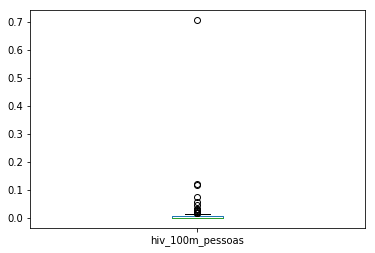

In [655]:
data.hiv_100m_pessoas.plot.box();

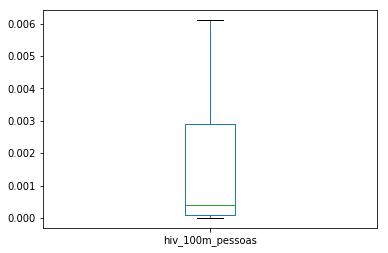

In [648]:
data.hiv_100m_pessoas[data.hiv_100m_pessoas < data.hiv_100m_pessoas.quantile(0.75)].plot.box();

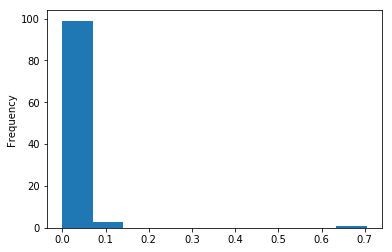

In [657]:
data.hiv_100m_pessoas.plot.hist();

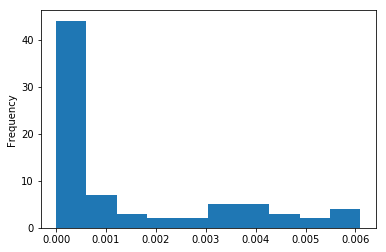

In [649]:
data.hiv_100m_pessoas[data.hiv_100m_pessoas < data.hiv_100m_pessoas.quantile(0.75)].plot.hist();

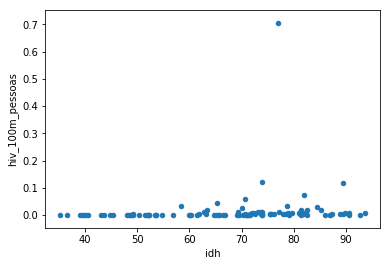

In [652]:
data.plot.scatter(x='idh', y = 'hiv_100m_pessoas');

In [411]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: -0.027229922596160652
Coeficiente angular: 0.0006237879392753951


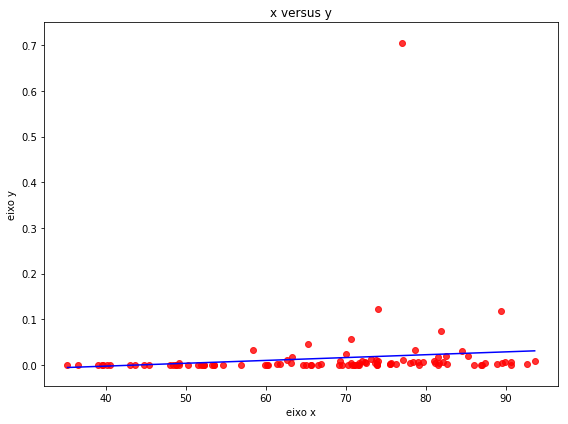

In [658]:
reta(data.idh, data.hiv_100m_pessoas)

In [659]:
data.loc[:, ["idh", "hiv_100m_pessoas"]].corr()

,idh,hiv_100m_pessoas
idh,1.000000,0.131024
hiv_100m_pessoas,0.131024,1.000000


Ajuste linear entre X3 e X4:
Coeficiente linear: -0.0027198366015526777
Coeficiente angular: 6.473159732408368e-05


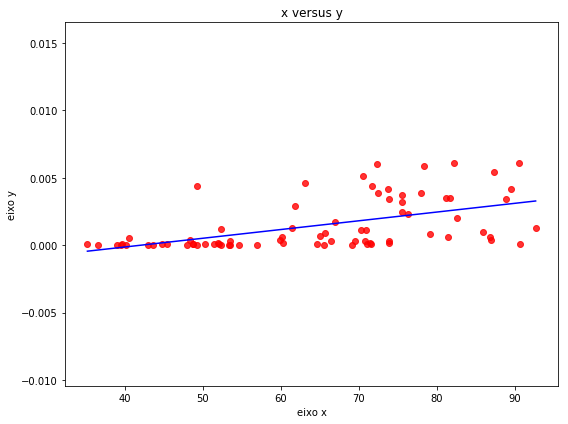

In [654]:
reta(data.idh[data.hiv_100m_pessoas < data.hiv_100m_pessoas.quantile(0.75)], data.hiv_100m_pessoas[data.hiv_100m_pessoas < data.hiv_100m_pessoas.quantile(0.75)]);

In [662]:
d1 = data.idh[data.hiv_100m_pessoas < data.hiv_100m_pessoas.quantile(0.75)]
d2 = data.hiv_100m_pessoas[data.hiv_100m_pessoas < data.hiv_100m_pessoas.quantile(0.75)]